### Dominant Color Extraction for Image Segmentation
- **IMAGE SEGMENTATION using K-Means Clustering**
- Segmentation: It basically partitions an image into multiple regions having similar visual appearance corresponding to parts of objects
- First, we will try to retrieve the most dominant 'K' Colors using K-Means Clustering
- Then, we will apply this algorithm to all pixels of the image and assign each pixel to the nearest cluster.

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>

In [1]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [2]:
im =  cv2.imread('cartoon.jpg') #Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB) # it will convert the BGR into RGB image.

In [3]:
original_shape = im.shape
print(im.shape)
# it is indicating that it has 512 rows, 512 columns and 3 channels(or depth)
# these channels are nothing but RGB

(512, 512, 3)


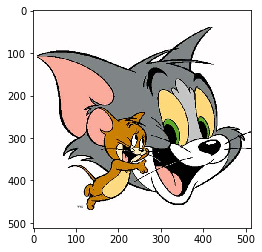

In [4]:
plt.imshow(im)
plt.show()

In [5]:
# Flatten Each channel of the Image
# this basically means that till now we have pixel values of the image in 3D matrix(ie, 330 x 500 x 3)
# but now we will convert it into 2D matrix where each column will represent a single channel.
# 512 * 512 = 262144
# (512 x 512 x 3) ----> (165000 x 3)
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(262144, 3)


In [6]:
dominant_colors = 4
# we are specifying that we wants to divide our image into 4 colors for that we will find our 4 most
# dominant colors.

In [7]:
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)
# we are training our model 

KMeans(n_clusters=4)

In [8]:
centers = km.cluster_centers_
print(centers,end="\n\n")
print(centers.shape)
# it has pixel values for all 4 centers.

[[241.93235714 187.40661552 154.50794855]
 [ 15.47505843  11.14795713   8.12720606]
 [254.53827887 252.75105865 253.51217613]
 [138.63197432 129.80130936 107.00667268]]

(4, 3)


In [9]:
centers = np.array(centers,dtype='uint8')
# to round off the decimal values of above centers
print(centers,end='\n\n')
print(centers.shape)

[[241 187 154]
 [ 15  11   8]
 [254 252 253]
 [138 129 107]]

(4, 3)


### Let's have a look on most dominating colors

[241 187 154]

[15 11  8]

[254 252 253]

[138 129 107]



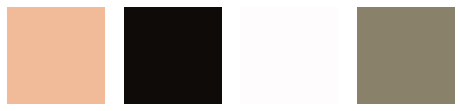

In [10]:
i = 1
plt.figure(0,figsize=(8,2))
colors = []

for each_color in centers:
    print(each_color,end='\n\n')
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_color)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)
    
plt.show()

In [11]:
colors
# pixel value of centers, ie pixel valuse of 4 dominant colors.

[array([241, 187, 154], dtype=uint8),
 array([15, 11,  8], dtype=uint8),
 array([254, 252, 253], dtype=uint8),
 array([138, 129, 107], dtype=uint8)]

## Segmenting Our Original Image

In [12]:
new_img = np.zeros((512*512,3),dtype='uint8')
print(new_img.shape)
# new_img to store the pixels of new image after performing segmentation

(262144, 3)


In [13]:
km.labels_
# it is basically assigning each pixel of original image with a label (here labels are nothing but 4 dominant
# colors). So now each pixel is in cluster of these 4 dominant colors
# 4 dominant colors- thats why labels are 0,1,2,3

array([2, 2, 2, ..., 2, 2, 2])

In [14]:
km.labels_.shape

(262144,)

In [15]:
new_img.shape[0]

262144

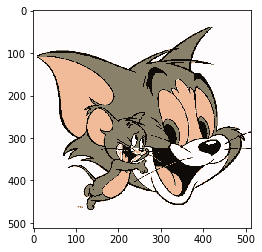

In [16]:
for ix in range(new_img.shape[0]): # for all columns, here new_img.shape[0] = 165000
                                   # here ix will move from 0 to (165000-1)
    new_img[ix] = colors[km.labels_[ix]] # it is assigning that color to given pixel which is given by 
                                         # the labels.
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

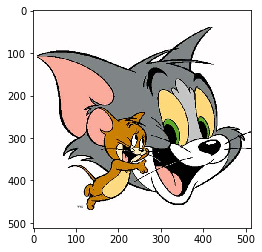

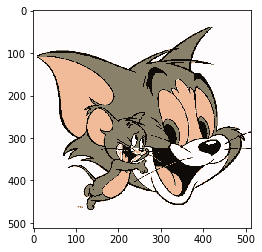

In [18]:
plt.imshow(im)
plt.show()
plt.imshow(new_img)
plt.show()
# difference b/w original and segmented image.